# EDA of Bankruptcy Data and Building SVM, Logit, and Naive Bayes Models

The goal is to explore the new data set and build three models (using an 80/20 train/test split) to predict bankruptcy of a firm.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

## Functions

In [2]:
def chart_gen(chart, bucket, col, df, features, target = None):
    """
    Uses the parameters to generate charts
    Parameters:
        chart (string): Chart type, options are hist, bar, and scatter
        bucket (int): if hist is chosen, the number of bins must be selected. If hist is not chosen,
        any value will work.
        col (int): number of charts to be in a single grid row for presentation purposes
        df (DataFrame): dataframe that the series are derived from
        features (list): list of features to be charted 
        target (string): name of target variable for scatter plot
    Returns:
        charts for the features chosen unless an incorrect chart name is given. Then a message
        requests the user to use a valid chart name.
    """
    if chart == 'hist':
        COUNT = 0
        fig = plt.figure(figsize=(25, 5))
        gs = GridSpec(nrows=1, ncols=col)

        for i in features:
            ax = fig.add_subplot(gs[0, COUNT])
            ax.hist(df[i], bins=bucket)
            plt.title("Histogram of " + str(i) + " Values")
            COUNT += 1

        plt.show()    
    
    elif chart == 'bar':
        COUNT = 0
        fig = plt.figure(figsize=(25, 5))
        gs = GridSpec(nrows=1, ncols=col)

        for i in features:
            counts = df[i].value_counts().sort_values()
            ax = fig.add_subplot(gs[0, COUNT])
            ax.bar(counts.index, counts)
            plt.xticks(rotation='vertical')
            plt.title("Histogram of " + str(i) + " Values")
            COUNT += 1
    
        plt.show()
        
    elif chart == 'box':
        COUNT = 0
        fig = plt.figure(figsize=(25, 5))
        gs = GridSpec(nrows=1, ncols=col)

        for i in features:
            ax = fig.add_subplot(gs[0, COUNT])
            ax.boxplot(df[i])
            plt.ylabel("Boxplot of " + str(i) + " Values")
            COUNT += 1
        
        fig.tight_layout()
        plt.show()
        
    elif chart == 'scatter':
        COUNT = 0
        fig = plt.figure(figsize=(25, 5))
        gs = GridSpec(nrows=1, ncols=col)

        for i in features:
            ax = fig.add_subplot(gs[0, COUNT])
            ax.scatter(df[i], df[target])
            plt.title("Scatter plot of " + str(i) + " and " + str(target))
            COUNT += 1
        
        fig.tight_layout()
        plt.show()
        
    elif chart == 'scatter-string':
        COUNT = 0
        fig = plt.figure(figsize=(25, 5))
        gs = GridSpec(nrows=1, ncols=col)

        for i in features:
            x_names = df[i].astype('category').drop_duplicates()
            x_values = df[i].astype('category').cat.codes
            ax = fig.add_subplot(gs[0, COUNT])
            ax.scatter(x_values, df[target])
            ax.set_xticks(range(0, len(x_names)))
            ax.set_xticklabels(list(x_names))
            plt.title("Scatter plot of " + str(i) + " and " + str(target))
            COUNT += 1
        
        fig.tight_layout()
        plt.show()
         
    else:
        return print('Please choose a valid chart type: hist, bar, box, scatter, or scatter-string')

## Ingest

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/jhancuch/bankrupty-classification-eda/main/data/data.csv?token=GHSAT0AAAAAABQBET45AFUEGRB7YHCYPKNYYPQUGTQ')

In [7]:
data.shape

(6819, 96)

In [8]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [12]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [13]:
data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


## EDA

### Dependent and Independent Variable Distributions

#### Dependent Variable

Dependent Variable Summary Statistics:
count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt?, dtype: float64

Dependent Variable Median: 0.0
Dependent Variable Mean: 0.03226279513125092



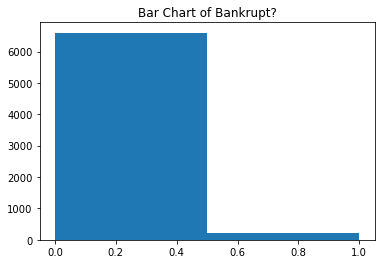

In [14]:
print('Dependent Variable Summary Statistics:\n{0}\n'.format(data['Bankrupt?'].describe()))
print('Dependent Variable Median: {0}'.format(data['Bankrupt?'].median()))
print('Dependent Variable Mean: {0}\n'.format(data['Bankrupt?'].mean()))

plt.hist(data['Bankrupt?'], bins = 2)
plt.title("Bar Chart of Bankrupt?")
plt.show()

#### Independent Variables

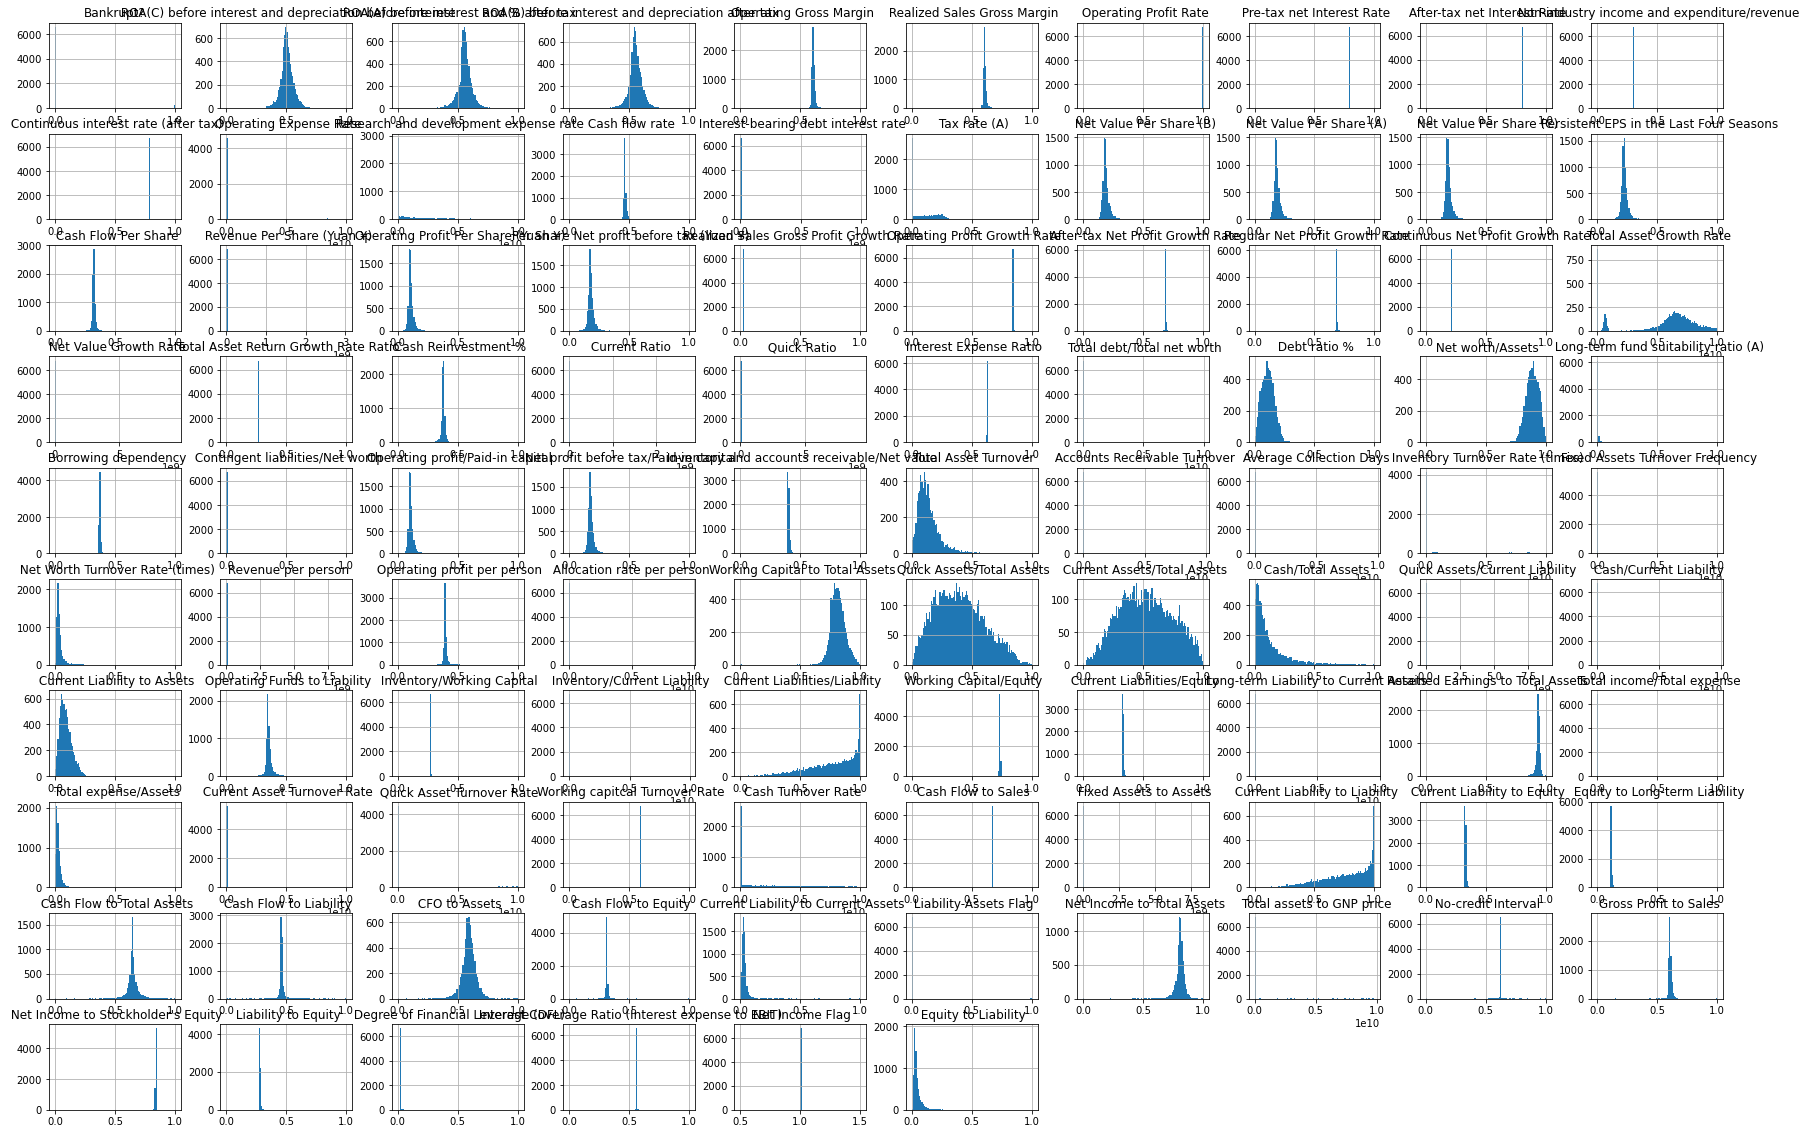

In [33]:
data.hist(bins = 100, figsize = (30, 20))
plt.show()

### Relationship between Bankruptcy? and Independent Variables

In [ ]:
sns.pairplot(data=data.iloc[:, 1:], hue="Bankrupt?")
plt.show()

## Preprocessing

## Modeling

## Conclusion